# Project Description

You are an analyst at a large online store. Together with the marketing team, you have compiled a list of hypotheses to help increase revenue. Your task is to prioritize these hypotheses, conduct A/B testing, and analyze the results.

# Import Library

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Prioritizing Hyphothesis

he file "hypotheses_us.csv" contains nine hypotheses to increase the revenue of an online store, with predefined Reach, Impact, Confidence, and Effort scores for each hypothesis.

Your tasks are as follows:

- Implement the ICE framework to prioritize the hypotheses. Rank the hypotheses in descending order based on their priority.
- Implement the RICE framework to prioritize the hypotheses. Rank the hypotheses in descending order based on their priority.
- Demonstrate the changes in hypothesis priorities when RICE is applied instead of ICE. Provide an explanation regarding these changes.

### Preparing Data

In [2]:
hypothesis = pd.read_csv('hypotheses_us_sp8.csv',sep =';')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']
hypothesis[['Hypothesis','ICE']].sort_values(by ='ICE', ascending = False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']
hypothesis[['Hypothesis','RICE']].sort_values(by ='RICE', ascending = False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


From the ICE scores, the prioritized hypothesis is:

Hypothesis 9 = **"Launch a promotion that gives users discounts on their birthday"**

However, when we consider the RICE scores, the prioritized hypothesis becomes:

Hypothesis 8 = **"Add a subscription form to all the main pages. This will help you compile a mailing list"**

Let's recall the parameter explanations:

- Reach: Knowing the number of users you reach is not difficult. You can use your existing data or evaluate competitors or market volume.

- Impact: The impact parameter measures how intensely the change affects the users reached.

- Confidence: The confidence parameter indicates how confident you are in your estimates for other parameters.

- Effort: The effort parameter shows the level of difficulty in testing the hypothesis.

The significant difference between these two hypotheses lies in the "Reach" parameter. Hypothesis 9 has a score of 10, meaning it can reach the audience much better compared to Hypothesis 8, which only has a score of 1.

As for the other parameters, there is not a significant difference.

Therefore, we choose Hypothesis 8 = **"Add a subscription form to all the main pages. This will help you compile a mailing list" using the RICE method.**

## A/B Testing Analysis

### Preparing Data and Screening

In [5]:
orders = pd.read_csv('orders_us_sp8.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
visitors = pd.read_csv('visits_us_sp8.csv')
visitors.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


We need to changes data type in date column

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


### Calculate Cumulative Revenue Based on Group

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [13]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [14]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [15]:
visitors

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Right now, we merge both dataset

In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


Let's make a graph from cumulative dataset above, however we need to deperate between group A and B before we make a graph.

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [19]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [20]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


Let's plot both cumulative datasets.

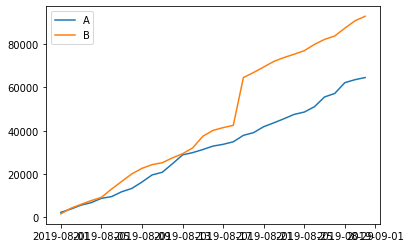

In [21]:
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label = "A")
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label = "B")
plt.legend()

#### Conclusion Calculate Cumulative Revenue Based on Group

We can see that for Group B, revenue is higher in the middle of the period compared to Group A. However, there is one spike in the data. We need to determine whether that data point is an outlier or normal.

### Calculate Cumulative Average Size Based in Groups

To calculate average orders, need to create new graph

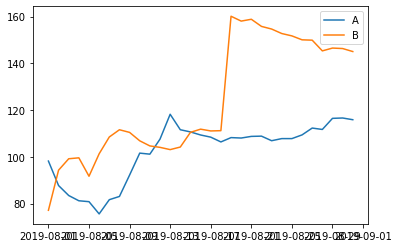

In [22]:
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],label = 'A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],label = 'B')
plt.legend()

Over time, the average orders for Group B are higher than those for Group A. In the middle, Group A has a higher average, but towards the end of the period, Group B dominates the average purchases. We indeed need to delve into the spike in Group B.

### Calculating the relative difference for the cumulative average order size of Group B compared to Group A.

to calculate relatives data differences, wen create datasets first

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


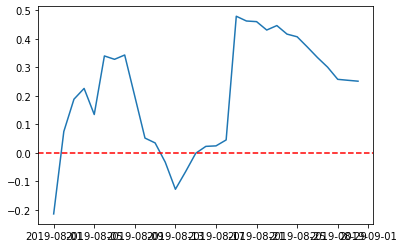

In [24]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')

We can see that the cumulative average order size in Group B is better than in Group A because the average results are above 0. However, from the initial graph to the last one in the relative average, there is a sharp spike in a specific period, most likely indicating an outlier.

### Calculate the Rate of Conversion Each Group as the Ratio of Orders to the Number of Visits Each Day

We need to calculate the conversion rate for each group. We can obtain this from the cumulativeData dataset and create a new column.

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


After that we seperate each group

In [26]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [27]:
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851


In [28]:
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793


Make graph for konversion table above.

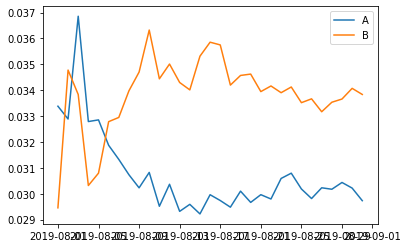

In [29]:
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label = 'B')
plt.legend()


We can see the conversion results for each group; consistently, group B has a higher conversion rate. Let's check the scatter plot and confirm the outliers.

No handles with labels found to put in legend.


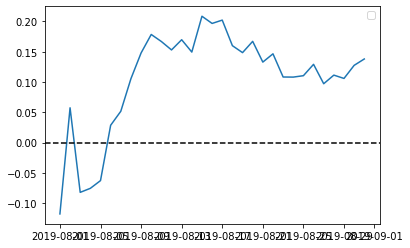

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')


### Creating a scatter plot for the number of orders per user.


In [31]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [32]:
ordersByUser = orders.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
ordersByUser.columns = ['userId', 'orders']
ordersByUser.sort_values(by = 'orders' , ascending = False)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

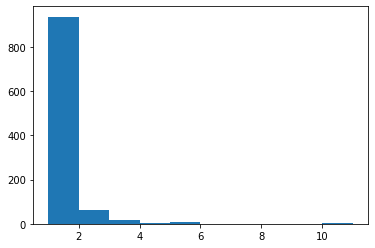

In [33]:
plt.hist(ordersByUser['orders']) 

The majority of users place 1 to 2 orders, with some placing 3 or 4 orders. There are also a few users with 5-6 orders and some with 10 or more. We need to further investigate this.

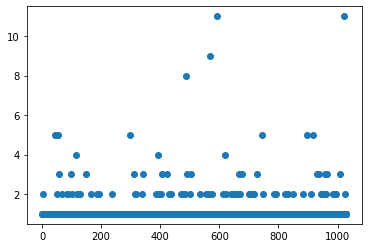

In [34]:
x_values = pd.Series(range(0,len(ordersByUser)))
plt.scatter(x_values, ordersByUser['orders'])

In [35]:
print(np.percentile(ordersByUser['orders'], [90, 95, 99]))

[1. 2. 4.]


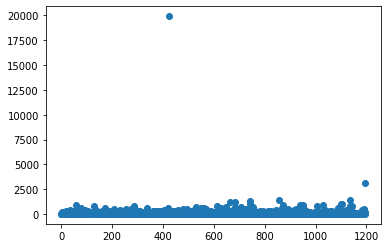

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

In [37]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[282.48  435.54  900.904]


For orders, we can observe the percentiles:


- Orders greater than 1 occur less than 10% of the time.
- Orders greater than 2 occur less than 5% of the time.
- Orders greater than 4 occur less than 1% of the time.


For order prices, we can observe the percentiles:

- Order prices greater than 282 occur less than 10% of the time.
- Order prices greater than 435 occur less than 5% of the time.
- Order prices greater than 900 occur less than 1% of the time.


There are outliers in the orders data, with orders having values of 20000 and 2500. These need to be removed, similar to orders above 10 that also need to be reviewed. We will attempt to find statistical significance.

### Finding statistical significance for the difference in conversion between groups using raw data.

In [38]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId').agg({'transactionId' : 'nunique'}).reset_index()
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId').agg({'transactionId' : 'nunique'}).reset_index()
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
ordersByUsersA.sort_values(by='orders',ascending = False).head()

,userId,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


In [41]:
ordersByUsersB.sort_values(by='orders',ascending = False).head()

,userId,orders
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4


In [42]:
visitors

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Now, we crate sample for conduct test significant 

We will test the hypothesis from the sample we will create whether the difference in conversion between groups A and B is significant or not.

- H0 = there is no significant difference in conversion between groups A and B
- H1 = there is a significant difference in conversion between groups A and B

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [44]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [45]:
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [46]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


The first row of the P-value output is 0.017, which is smaller than 0.05. Therefore, we can reject the null hypothesis, meaning that the difference in conversion between groups A and B is significant. However, the second row shows an increase of 13.8 percent, indicating that the conversion of group B has increased compared to group A.

### Finding statistical significance for the difference in size orders between groups using raw data.

Now we will test the hypothesis from the sample on whether the difference in average order size between groups A and B is significant or not.

H0 = There is no significant difference in average order size between groups A and B.
H1 = There is a significant difference in average order size between groups A and B.

In [47]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


The p-value is much higher than 0.05, so we cannot reject the null hypothesis and conclude that the difference in average order size between the groups is not significant. However, the average order size for group B is indeed larger than that of group A.

### Finding statistical significance for the difference in conversion between groups using Filtered data.

In [48]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 700]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape)


1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
dtype: int64
(29,)



in total, we have 29 abnormal users

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Now we will use the filtered data and test the hypothesis from the sample whether the difference in conversion between groups A and B is significant or not.

- H0 = no significant difference in conversion between groups A and B
- H1 = significant difference in conversion between groups A and B

In [50]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
0.161


The first row of the P-value output is 0.010, which is smaller than 0.05. Therefore, we can reject the null hypothesis; there is no significant difference in conversion between groups A and B. However, the second row shows an increase of 16.1 percent, indicating that the conversion of group B has increased compared to group A.

let's see what happen to the value of average size orders

In [51]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.724
0.039


The result is the same; the P-value is much higher than 0.05, so we cannot reject the null hypothesis, and we conclude that the average order size between groups is not significant. However, the average order size for group B remains larger than group A, but the percentage difference has decreased to 4%.

# Conclusion

If we observe the significance level of the conversion difference between the filtered and raw data, there is no change; it remains below 0.05, meaning we can reject the null hypothesis. The percentage difference is not significantly different.

However, when we look at the significance level based on the order size, the P-value is much higher than 0.05. Therefore, we cannot reject the null hypothesis and conclude that the average order size between groups is different. However, the average order size for group B is still larger than group A.

No handles with labels found to put in legend.


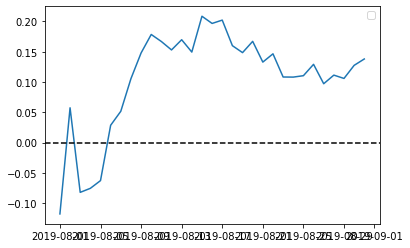

In [52]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

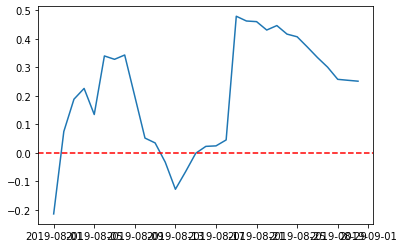

In [53]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')

So, the decision we make is to stop the testing and consider one of the groups as the leader. The group B can generate more revenue, with higher conversion and revenue.